<a href="https://colab.research.google.com/github/Rahul-dsml/Myprojects/blob/main/House_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## To find out the significant variables affecting house prce variation using regularization.

In [97]:
# importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Reading and understanding the dataset

In [98]:
data= pd.read_csv('/content/drive/MyDrive/UpGrad/Regression/house_prices.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [99]:
data.shape

(1460, 81)

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [101]:
Null_values= data.isnull().sum()/data.shape[0]
Null_values[Null_values>0].sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

There are various columns which have information in terms of null values

In [102]:
col_with_null= ['Alley', 'FireplaceQu', 'PoolQC', 
                'Fence', 'MiscFeature', 'GarageCond', 
                'GarageType', 'GarageFinish', 'GarageQual', 
                'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 
                'BsmtCond', 'BsmtFinType1']

In [103]:
for col in col_with_null:
  data[col].fillna('None', inplace=True)

In [104]:
Null_values= data.isnull().sum()/data.shape[0]
Null_values[Null_values>0].sort_values(ascending=False)

LotFrontage    0.177397
GarageYrBlt    0.055479
MasVnrType     0.005479
MasVnrArea     0.005479
Electrical     0.000685
dtype: float64

Inspecting these columns one by one

In [105]:
# LotFrontage
data['LotFrontage'].dtype

dtype('float64')

In [106]:
data['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


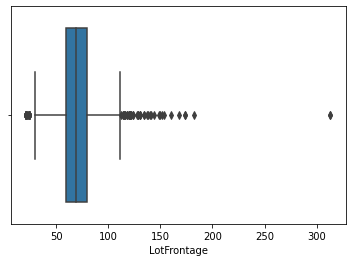

In [107]:
sns.boxplot(data['LotFrontage'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


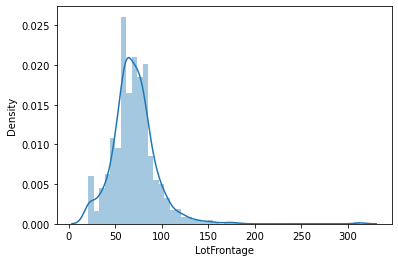

In [108]:
sns.distplot(data['LotFrontage'])
plt.show()

In [109]:
data['LotFrontage']= data['LotFrontage'].fillna(data['LotFrontage'].mean())

In [110]:
# GarageYrBlt
data['GarageYrBlt'].dtype

dtype('float64')

In [111]:
data['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


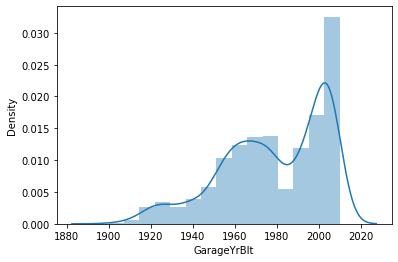

In [112]:
sns.distplot(data['GarageYrBlt'])
plt.show()

In [113]:
data['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [114]:
data['GarageYrBlt']= data['GarageYrBlt'].fillna(method='bfill')

In [115]:
#MasVnrType
data.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [116]:
data.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [117]:
data.MasVnrType= data.MasVnrType.fillna(data.MasVnrType.mode()[0])

In [118]:
#MasVnrArea
data.MasVnrArea.unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


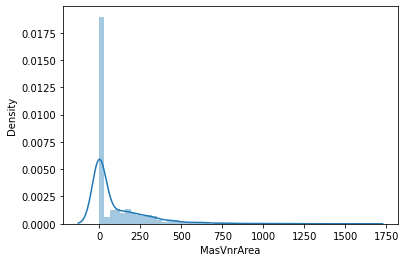

In [119]:
sns.distplot(data.MasVnrArea)
plt.show()

In [120]:
data.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [121]:
data.MasVnrArea= data.MasVnrArea.fillna(data.MasVnrArea.median())

In [122]:
#Electrical
data.Electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


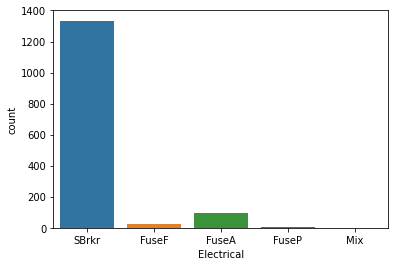

In [123]:
sns.countplot(data.Electrical)
plt.show()

In [124]:
data.Electrical= data.Electrical.fillna(data.Electrical.mode()[0])

In [125]:
data.isnull().sum().sum()

0

All the missing values are handled

Inspecting numerical columns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


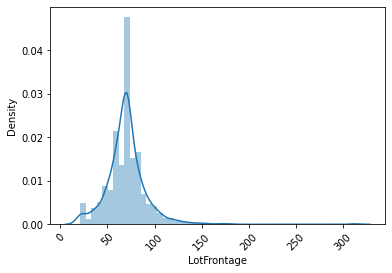

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


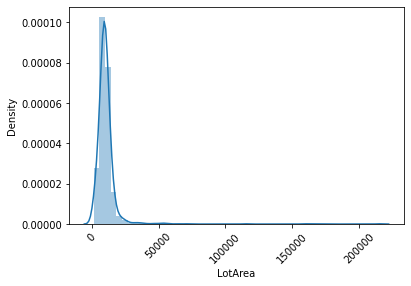

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


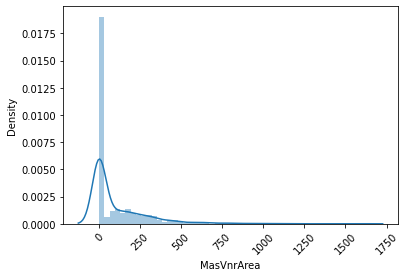

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


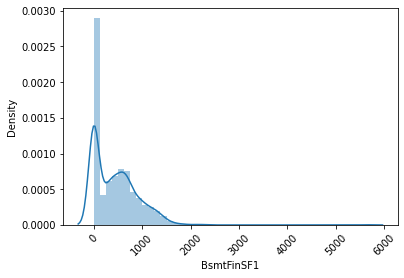

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


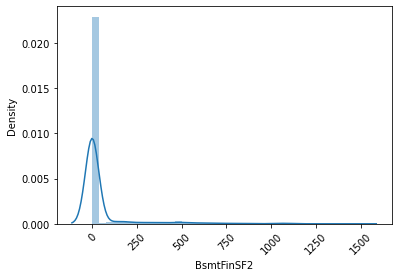

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


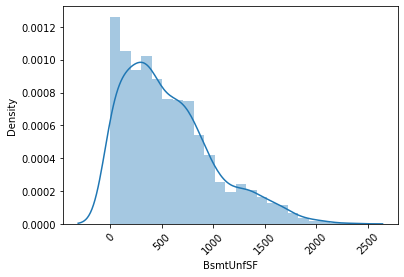

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


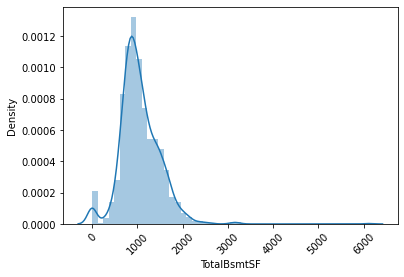

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


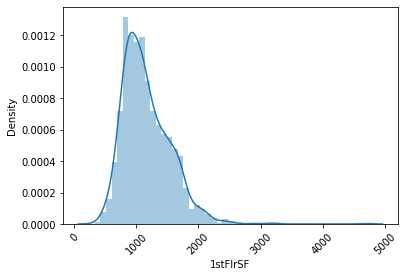

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


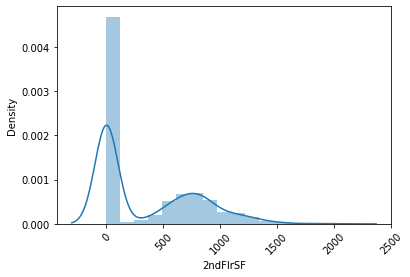

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


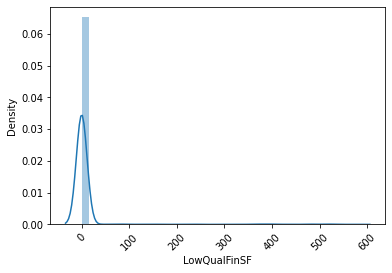

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


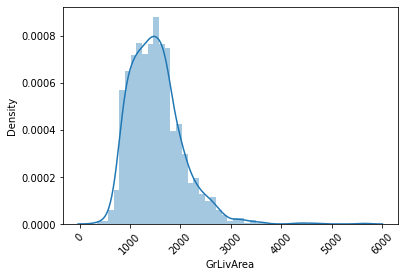

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


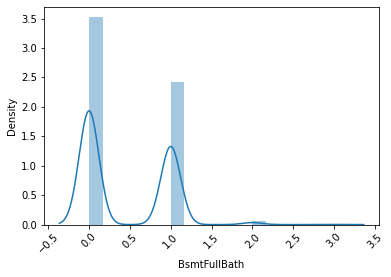

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


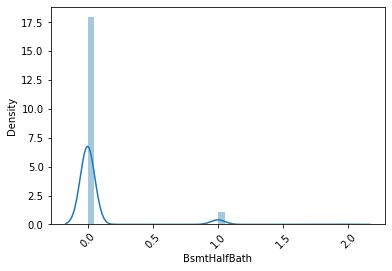

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


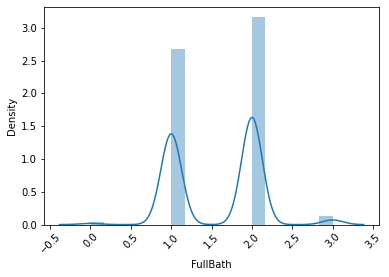

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


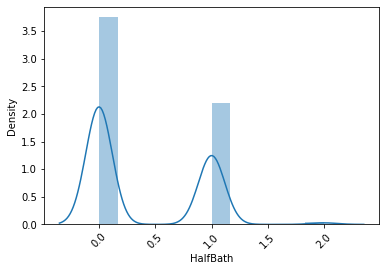

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


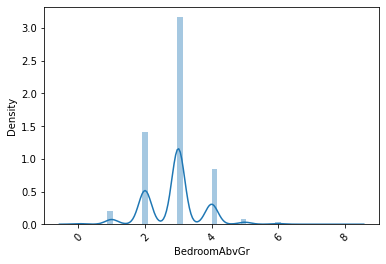

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


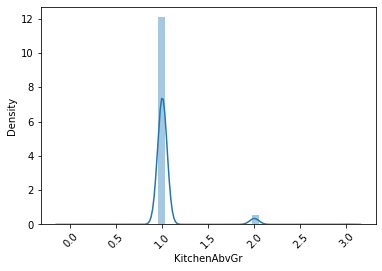

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


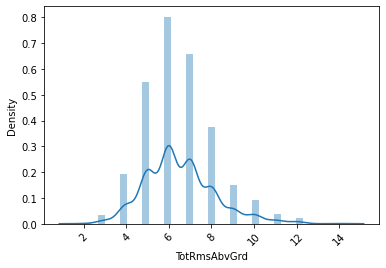

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


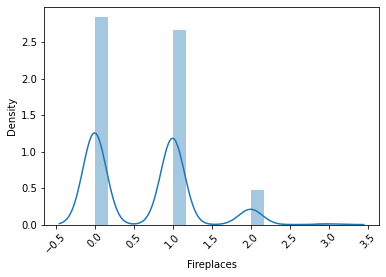

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


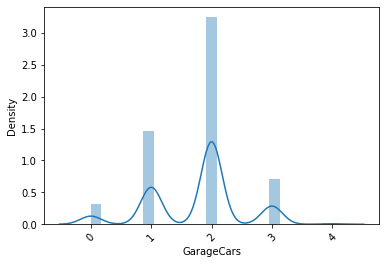

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


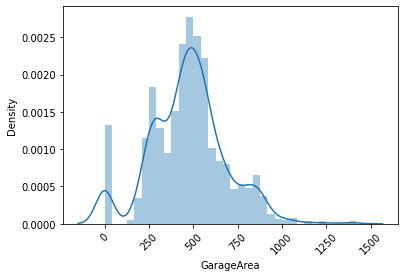

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


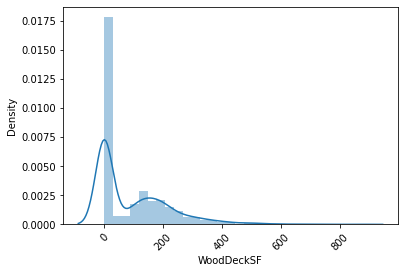

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


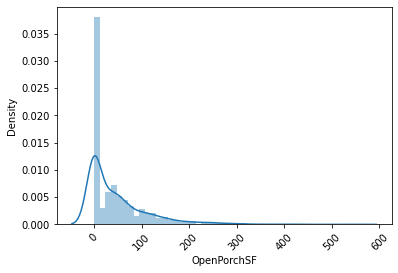

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


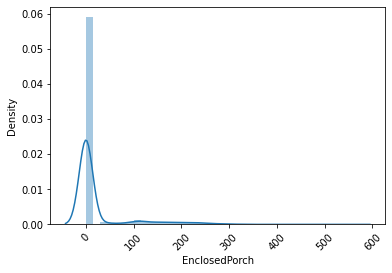

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


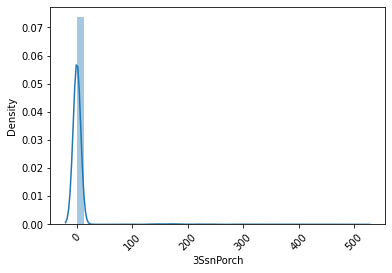

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


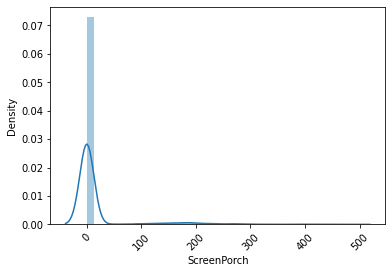

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


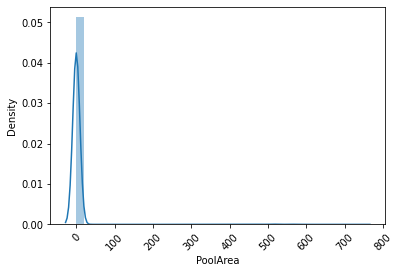

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


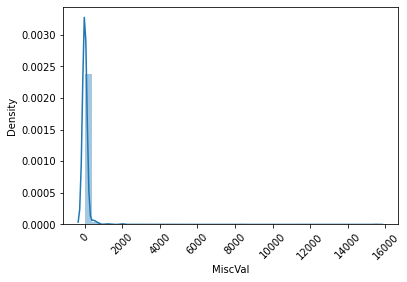

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


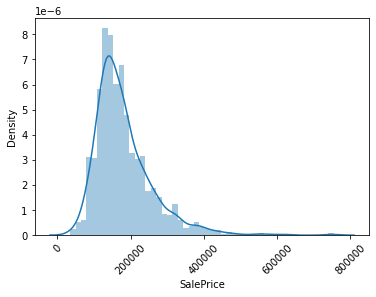

KeyError: ignored

In [126]:
for col in num_cols:
  sns.distplot(data[col])
  plt.xticks(rotation=45)
  plt.show()

Columns with categorical features are converted into categorical columns

In [127]:
#Converting the data type to object..
data.MSSubClass= data.MSSubClass.astype('object')
data.OverallQual= data.OverallQual.astype('object')
data.OverallCond= data.OverallCond.astype('object')

The columns having information of years are transformed by calculating the number of years.

In [128]:
data['remodelling_yr']=data.YearRemodAdd.apply(lambda x: int(2021-x))
data['built_yr']=data.YearBuilt.apply(lambda x: int(2021-x))
data['garage_yr']=data.GarageYrBlt.apply(lambda x: int(2021-x))
data['sold_yr']=data.YrSold.apply(lambda x: int(2021-x))

In [129]:
#Dropping the original year variables and also Id column as it not necessary 
num_col_to_drop= ['YearRemodAdd', 'YearBuilt', 'GarageYrBlt', 'YrSold', 'Id']

The 'MoSold' variables have information about month in which property was sold. Hence it is a categorical variable.

In [130]:
def month(x):
    if x==1:
        return 'January'
    elif x==2:
        return 'February'
    elif x==3:
        return 'March'
    elif x==4:
        return 'April'
    elif x==5:
        return 'May'
    elif x==6:
        return 'June'
    elif x==7:
        return 'July'
    elif x==8:
        return 'August'
    elif x==9:
        return 'September'
    elif x==10:
        return 'October'
    elif x==11:
        return 'November'
    elif x==12:
        return 'December'
    
data.MoSold= data.MoSold.apply(month)
data.MoSold.value_counts()

June         253
July         234
May          204
April        141
August       122
March        106
October       89
November      79
September     63
December      59
January       58
February      52
Name: MoSold, dtype: int64

## Exploratory Data Analysis

In [131]:
cat_cols= data.select_dtypes('object').columns
cat_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [132]:
num_cols= data.select_dtypes(['int64', 'float64']).columns
num_cols

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SalePrice',
       'remodelling_yr', 'built_yr', 'garage_yr', 'sold_yr'],
      dtype='object')

Data Visualization of categorical columns

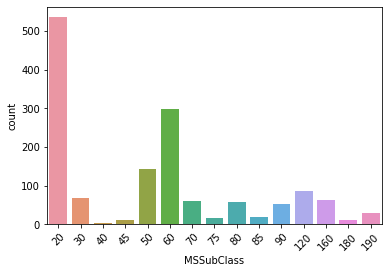

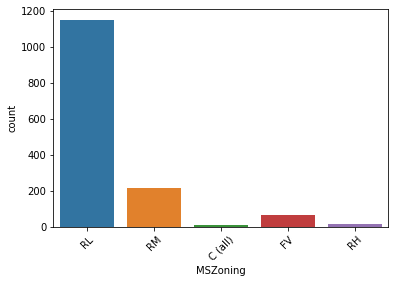

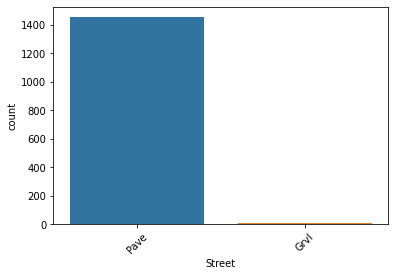

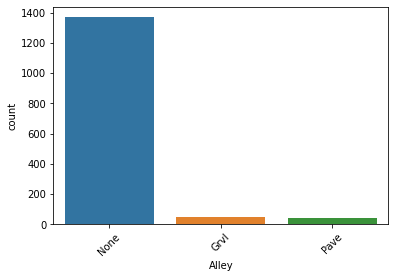

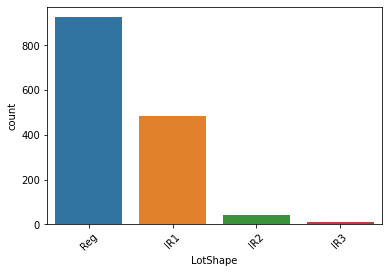

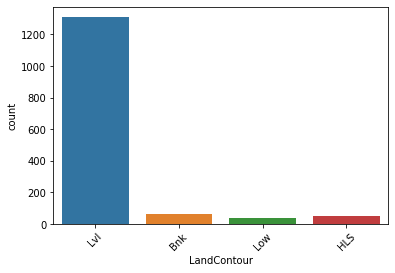

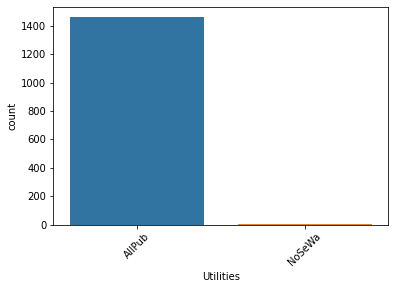

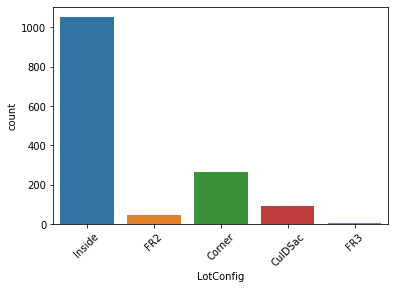

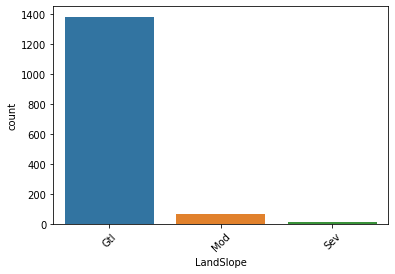

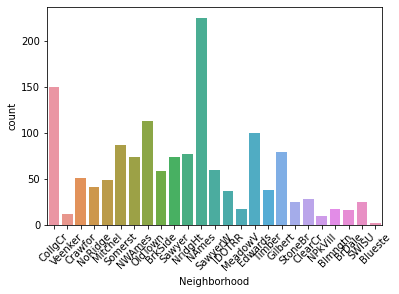

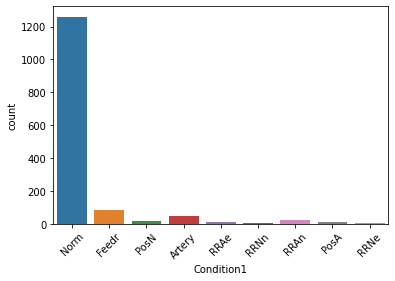

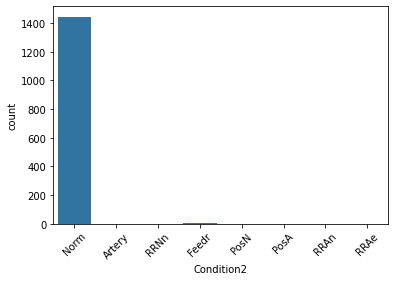

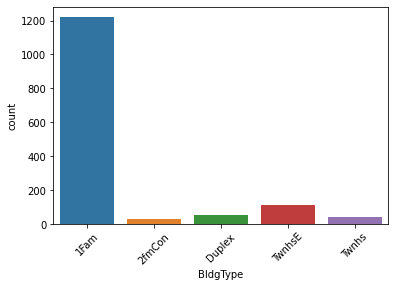

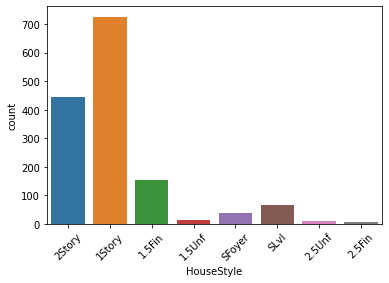

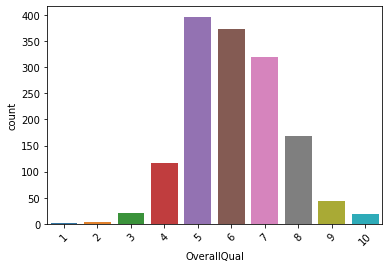

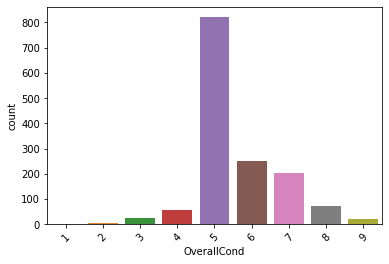

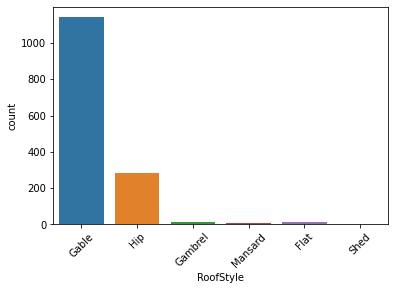

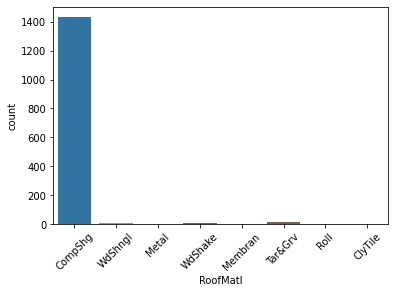

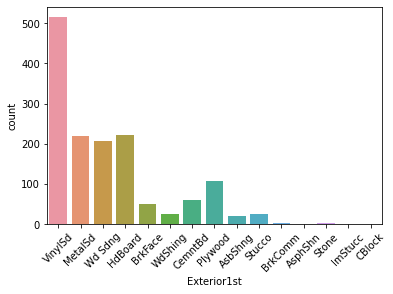

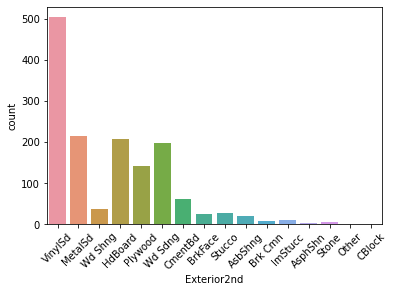

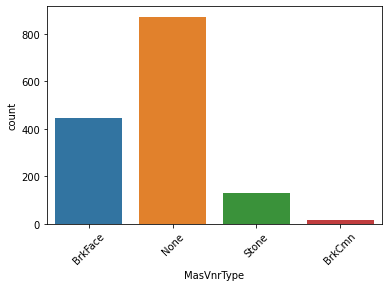

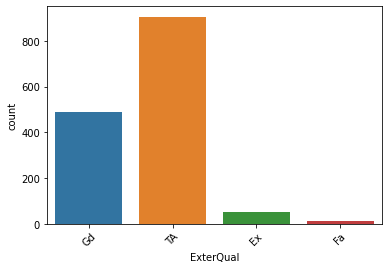

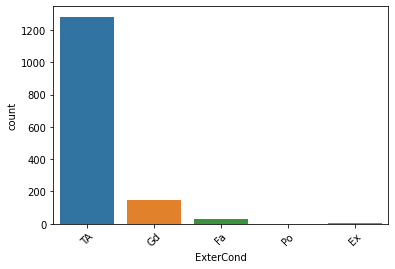

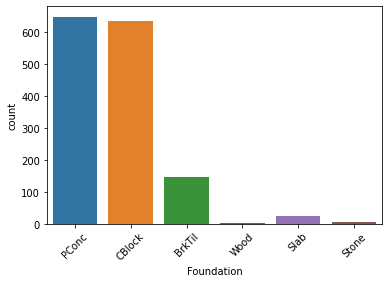

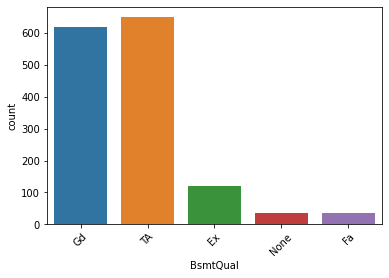

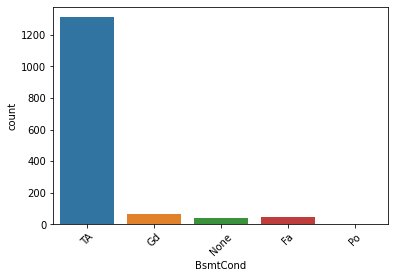

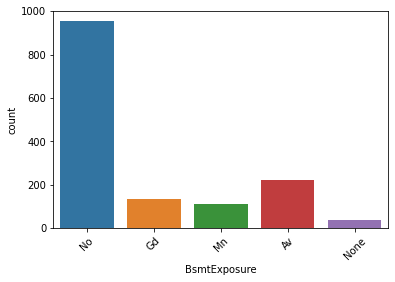

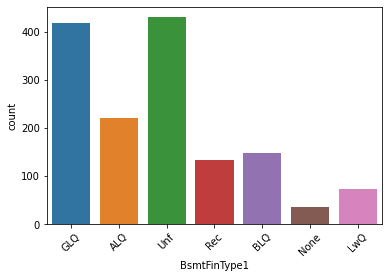

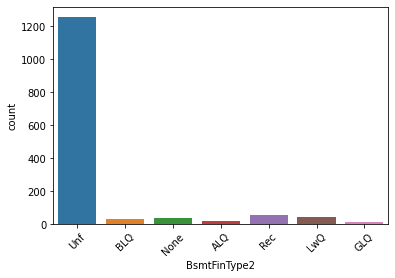

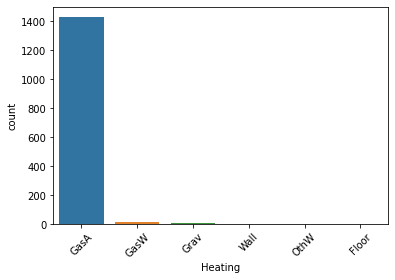

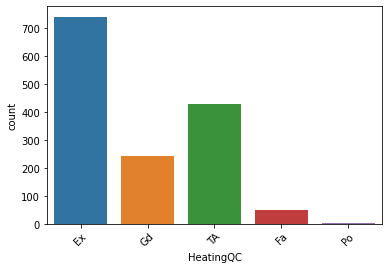

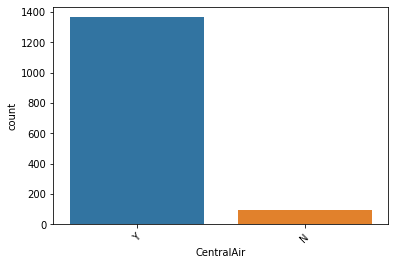

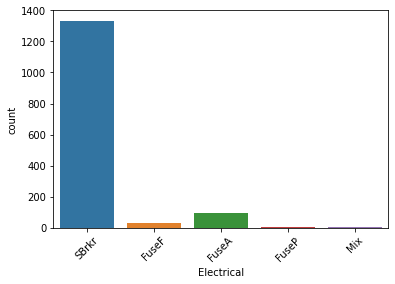

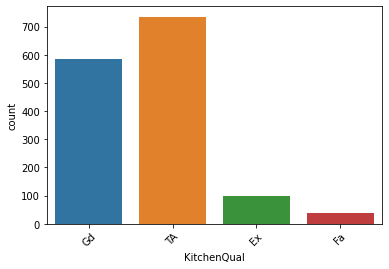

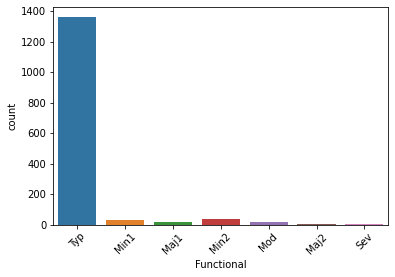

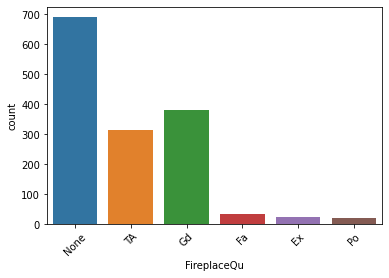

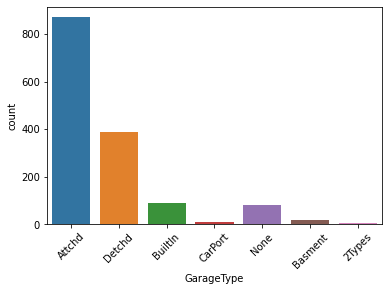

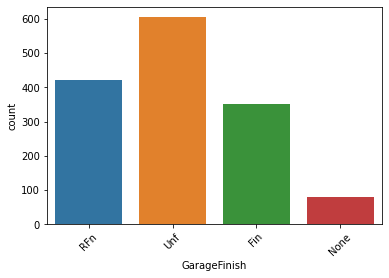

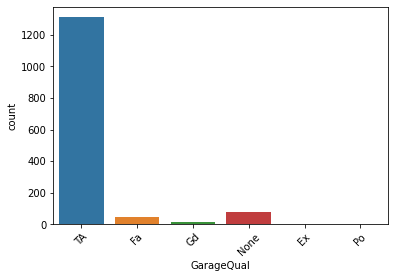

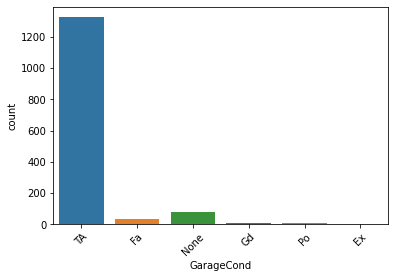

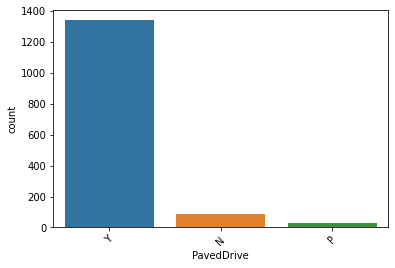

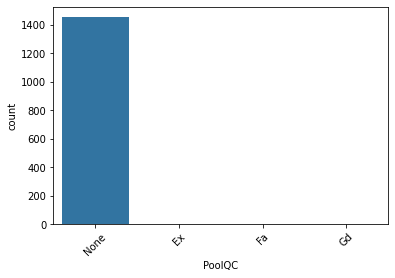

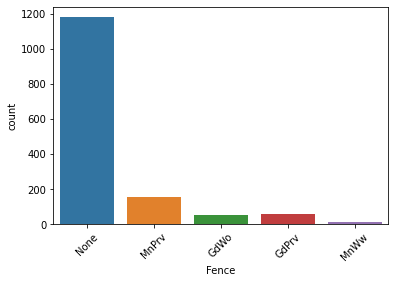

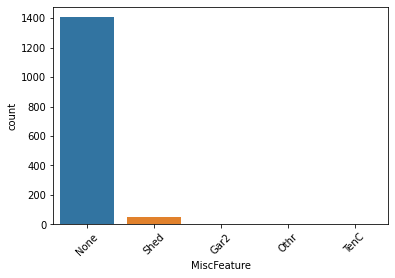

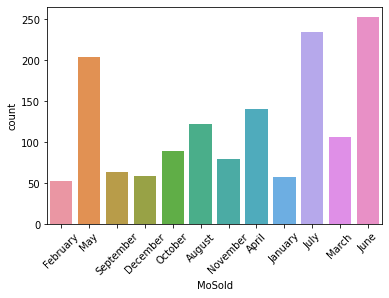

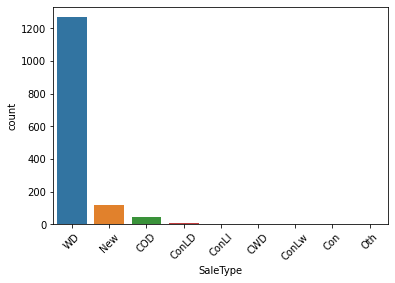

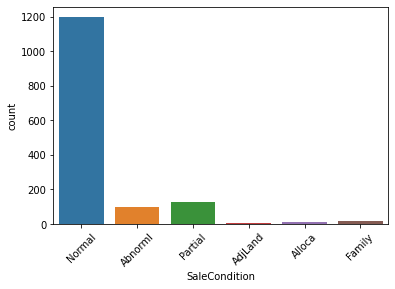

In [133]:
for col in cat_cols:
  sns.countplot(x= data[col])
  plt.xticks(rotation=45)
  plt.show()

Several columns have very biased values. Identifying the columns with more than 85% bias.

In [134]:
high_bias_cat= []
for col in cat_cols:
  print(data[col].value_counts(normalize=True))
  if data[col].value_counts(normalize=True).iloc[0] > 0.85:
    high_bias_cat.append(col)
print("High Bias Category columns are: ", high_bias_cat)

20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
None    0.937671
Grvl    0.034247
Pave    0.028082
Name: Alley, dtype: float64
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlo

In [135]:
len(high_bias_cat)

21

In [136]:
col_to_drop= high_bias_cat

In [137]:
col_to_drop.extend(num_col_to_drop)
col_to_drop

['Street',
 'Alley',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'MiscFeature',
 'SaleType',
 'YearRemodAdd',
 'YearBuilt',
 'GarageYrBlt',
 'YrSold',
 'Id']

In [138]:
len(col_to_drop)

26

In [139]:
data.drop(col_to_drop, axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 59 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSSubClass      1460 non-null   object 
 1   MSZoning        1460 non-null   object 
 2   LotFrontage     1460 non-null   float64
 3   LotArea         1460 non-null   int64  
 4   LotShape        1460 non-null   object 
 5   LotConfig       1460 non-null   object 
 6   Neighborhood    1460 non-null   object 
 7   BldgType        1460 non-null   object 
 8   HouseStyle      1460 non-null   object 
 9   OverallQual     1460 non-null   object 
 10  OverallCond     1460 non-null   object 
 11  RoofStyle       1460 non-null   object 
 12  Exterior1st     1460 non-null   object 
 13  Exterior2nd     1460 non-null   object 
 14  MasVnrType      1460 non-null   object 
 15  MasVnrArea      1460 non-null   float64
 16  ExterQual       1460 non-null   object 
 17  Foundation      1460 non-null   o

In [140]:
data.shape

(1460, 59)

## Bivariate analysis

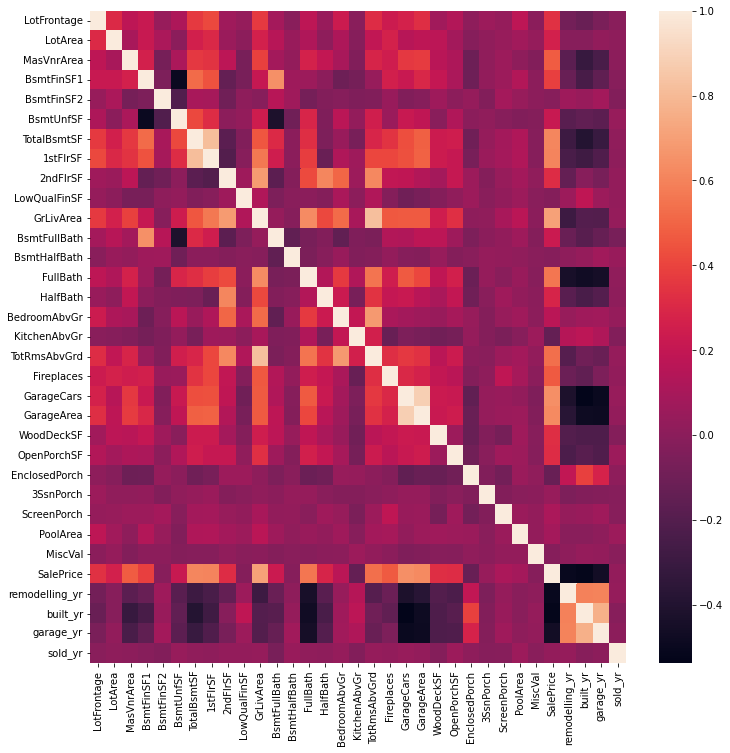

In [141]:
plt.figure(figsize= (12,12))
sns.heatmap(data.corr())
plt.show()

## Data Preparation

In [142]:
data.shape

(1460, 59)

In [143]:
cat_cols= data.select_dtypes('object').columns
len(cat_cols)

26

In [144]:
num_cols= data.select_dtypes(exclude='object').columns
len(num_cols)

33

In [ ]:
for col in cat_cols:
  print(data[col].value_counts(normalize=True))

In [145]:
data['MSSubClass'].value_counts(normalize=True)

20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


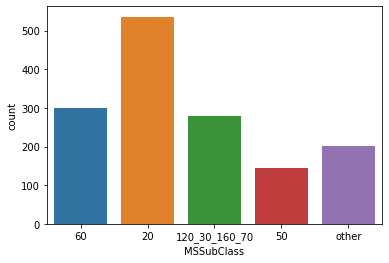

In [146]:
def mssubclass(x):
  if x in [20, 60, 50]:
    return str(x)
  elif x in [120, 30, 160, 70]:
    return '120_30_160_70'
  else:
    return 'other'
  
data['MSSubClass']= data['MSSubClass'].apply(mssubclass)
sns.countplot(data['MSSubClass'])
plt.show()

In [149]:
data['MSZoning'].value_counts(normalize=True)

RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


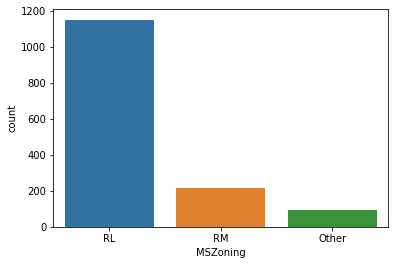

In [150]:
#MSZoning
def msszoning(x):
    if x not in ['RL', 'RM']:
        return 'Other'
    else:
        return x
data.MSZoning= data.MSZoning.apply(msszoning)
sns.countplot(data.MSZoning)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


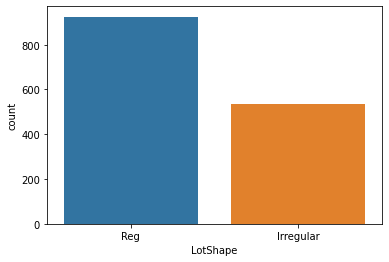

In [151]:
#LotShape
def lotshape(x):
    if x not in ['Reg']:
        return 'Irregular'
    else:
        return x
data.LotShape= data.LotShape.apply(lotshape)
sns.countplot(data.LotShape)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


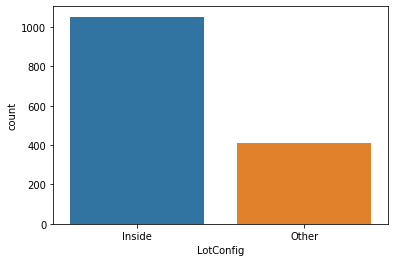

In [153]:
#LotConfig
def lotconfig(x):
    if x not in ['Inside']:
        return 'Other'
    else:
        return x
data.LotConfig= data.LotConfig.apply(lotconfig)
sns.countplot(data.LotConfig)
plt.show()

In [154]:
data['Neighborhood'].value_counts(normalize=True)

NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
StoneBr    0.017123
SWISU      0.017123
MeadowV    0.011644
Blmngtn    0.011644
BrDale     0.010959
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: Neighborhood, dtype: float64

These all are names of physical locations, so can't club the categories.

In [155]:
data['BldgType'].value_counts(normalize=True)

1Fam      0.835616
TwnhsE    0.078082
Duplex    0.035616
Twnhs     0.029452
2fmCon    0.021233
Name: BldgType, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


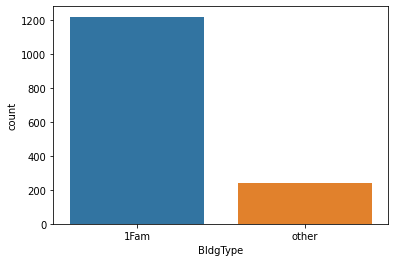

In [156]:
def buildingtype(x):
  if x not in ['1Fam']:
    return 'other'
  else:
    return x
data['BldgType']= data['BldgType'].apply(buildingtype)
sns.countplot(data['BldgType'])
plt.show()

In [157]:
data['HouseStyle'].value_counts(normalize=True)

1Story    0.497260
2Story    0.304795
1.5Fin    0.105479
SLvl      0.044521
SFoyer    0.025342
1.5Unf    0.009589
2.5Unf    0.007534
2.5Fin    0.005479
Name: HouseStyle, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


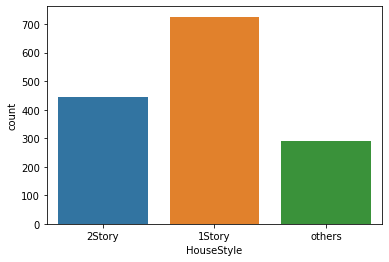

In [158]:
def housestyle(x):
  if x in ['1Story', '2Story']:
    return x
  else:
    return 'others'

data['HouseStyle']= data['HouseStyle'].apply(housestyle)
sns.countplot(data['HouseStyle'])
plt.show()

In [159]:
data['OverallQual'].value_counts(normalize=True)

5     0.271918
6     0.256164
7     0.218493
8     0.115068
4     0.079452
9     0.029452
3     0.013699
10    0.012329
2     0.002055
1     0.001370
Name: OverallQual, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


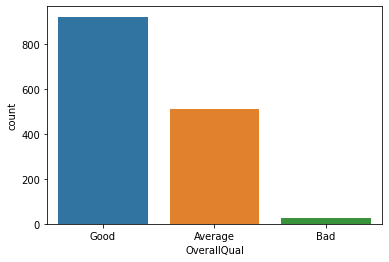

In [160]:
def quality(x):
  if x >=6:
    return 'Good'
  elif x <=3:
    return 'Bad'
  else:
    return 'Average'
data['OverallQual']= data['OverallQual'].apply(quality)
sns.countplot(data['OverallQual'])
plt.show()

In [162]:
data['OverallCond'].value_counts(normalize=True)

5    0.562329
6    0.172603
7    0.140411
8    0.049315
4    0.039041
3    0.017123
9    0.015068
2    0.003425
1    0.000685
Name: OverallCond, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


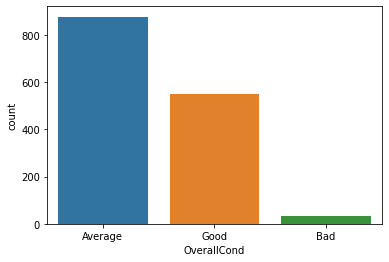

In [163]:
data['OverallCond']= data['OverallCond'].apply(quality)
sns.countplot(data['OverallCond'])
plt.show()

In [165]:
data['RoofStyle'].value_counts(normalize=True)

Gable      0.781507
Hip        0.195890
Flat       0.008904
Gambrel    0.007534
Mansard    0.004795
Shed       0.001370
Name: RoofStyle, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


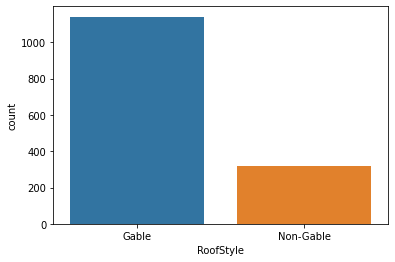

In [166]:
def roof(x):
  if x not in ['Gable']:
    return 'Non-Gable'
  else:
    return x
data['RoofStyle']= data['RoofStyle'].apply(roof)
sns.countplot(data['RoofStyle'])
plt.show()

In [168]:
data['Exterior1st'].value_counts(normalize=True)

VinylSd    0.352740
HdBoard    0.152055
MetalSd    0.150685
Wd Sdng    0.141096
Plywood    0.073973
CemntBd    0.041781
BrkFace    0.034247
WdShing    0.017808
Stucco     0.017123
AsbShng    0.013699
BrkComm    0.001370
Stone      0.001370
AsphShn    0.000685
ImStucc    0.000685
CBlock     0.000685
Name: Exterior1st, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


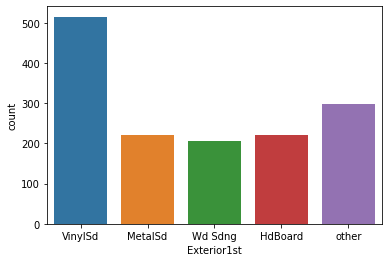

In [169]:
def ext1(x):
  if x in ['VinylSd', 'HdBoard', 'MetalSd', 'Wd Sdng']:
    return x
  else:
    return 'other'

data['Exterior1st']= data['Exterior1st'].apply(ext1)
sns.countplot(data['Exterior1st'])
plt.show()

In [170]:
data['Exterior2nd'].value_counts(normalize=True)

VinylSd    0.345205
MetalSd    0.146575
HdBoard    0.141781
Wd Sdng    0.134932
Plywood    0.097260
CmentBd    0.041096
Wd Shng    0.026027
Stucco     0.017808
BrkFace    0.017123
AsbShng    0.013699
ImStucc    0.006849
Brk Cmn    0.004795
Stone      0.003425
AsphShn    0.002055
Other      0.000685
CBlock     0.000685
Name: Exterior2nd, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


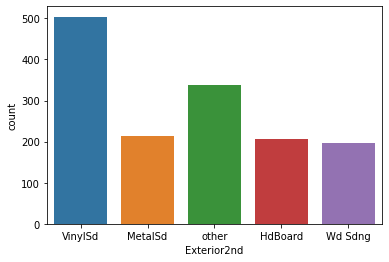

In [171]:
data['Exterior2nd']= data['Exterior2nd'].apply(ext1)
sns.countplot(data['Exterior2nd'])
plt.show()

In [172]:
data['MasVnrType'].value_counts(normalize=True)

None       0.597260
BrkFace    0.304795
Stone      0.087671
BrkCmn     0.010274
Name: MasVnrType, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


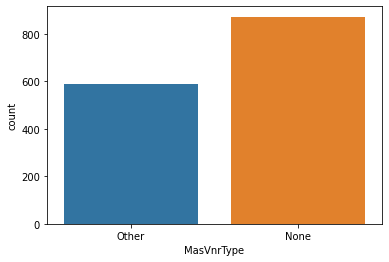

In [176]:
def masvnrtype(x):
  if x not in ['None']:
    return 'Other'
  else:
    return x

data['MasVnrType']= data['MasVnrType'].apply(masvnrtype)
sns.countplot(data['MasVnrType'])
plt.show()

In [178]:
data['ExterQual'].value_counts(normalize=True)

TA    0.620548
Gd    0.334247
Ex    0.035616
Fa    0.009589
Name: ExterQual, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


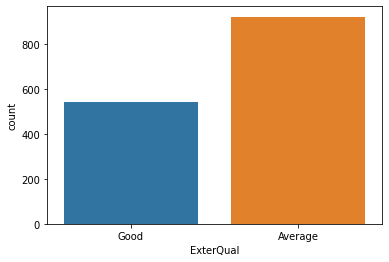

In [179]:
def exterqual(x):
  if x in ['TA', 'Fa']:
    return 'Average'
  else:
    return 'Good'

data['ExterQual']= data['ExterQual'].apply(exterqual)
sns.countplot(data['ExterQual'])
plt.show()

In [180]:
data['Foundation'].value_counts(normalize=True)

PConc     0.443151
CBlock    0.434247
BrkTil    0.100000
Slab      0.016438
Stone     0.004110
Wood      0.002055
Name: Foundation, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


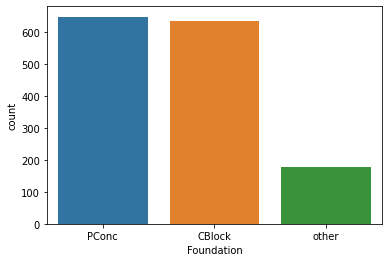

In [181]:
def foundation(x):
  if x in ['PConc', 'CBlock']:
    return x
  else:
    return 'other'

data['Foundation']= data['Foundation'].apply(foundation)
sns.countplot(data['Foundation'])
plt.show()

In [182]:
data['BsmtQual'].value_counts(normalize=True)

TA      0.444521
Gd      0.423288
Ex      0.082877
None    0.025342
Fa      0.023973
Name: BsmtQual, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


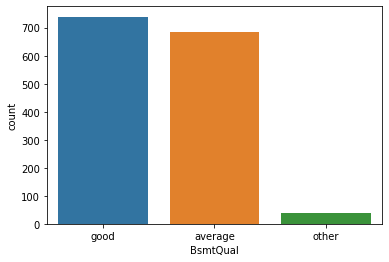

In [183]:
def bsmt(x):
  if x in ['Ex', 'Gd']:
    return 'good'
  elif x in ['TA', 'Fa']:
    return 'average'
  else:
    return 'other'

data['BsmtQual']= data['BsmtQual'].apply(bsmt)
sns.countplot(data['BsmtQual'])
plt.show()

In [184]:
data['BsmtExposure'].value_counts(normalize=True)

No      0.652740
Av      0.151370
Gd      0.091781
Mn      0.078082
None    0.026027
Name: BsmtExposure, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


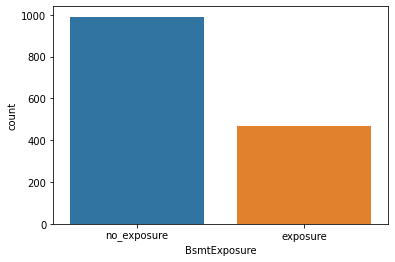

In [186]:
def exposure(x):
  if x in ['Av', 'Gd', 'Mn']:
    return 'exposure'
  else:
    return 'no_exposure'

data['BsmtExposure']= data['BsmtExposure'].apply(exposure)
sns.countplot(data['BsmtExposure'])
plt.show()

In [187]:
data['BsmtFinType1'].value_counts(normalize=True)

Unf     0.294521
GLQ     0.286301
ALQ     0.150685
BLQ     0.101370
Rec     0.091096
LwQ     0.050685
None    0.025342
Name: BsmtFinType1, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


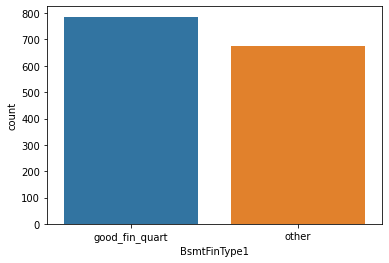

In [188]:
def bsmtfin(x):
  if x in ['GLQ', 'ALQ', 'BLQ']:
    return 'good_fin_quart'
  else:
    return 'other'

data['BsmtFinType1']= data['BsmtFinType1'].apply(bsmtfin)
sns.countplot(data['BsmtFinType1'])
plt.show()

In [189]:
data['HeatingQC'].value_counts(normalize=True)

Ex    0.507534
TA    0.293151
Gd    0.165068
Fa    0.033562
Po    0.000685
Name: HeatingQC, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


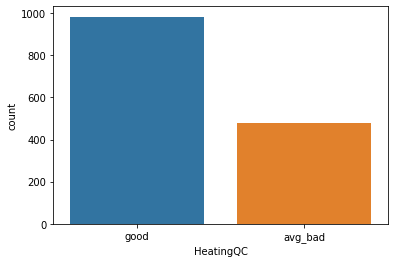

In [190]:
def heating(x):
  if x in ['Ex', 'Gd']:
    return 'good'
  else:
    return 'avg_bad'
data['HeatingQC']= data['HeatingQC'].apply(heating)
sns.countplot(data['HeatingQC'])
plt.show()

In [191]:
data['KitchenQual'].value_counts(normalize=True)

TA    0.503425
Gd    0.401370
Ex    0.068493
Fa    0.026712
Name: KitchenQual, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


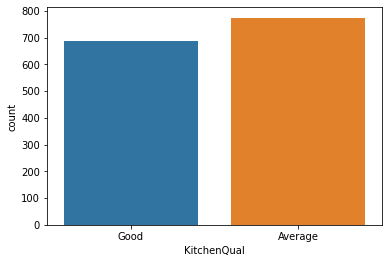

In [192]:
def kitchen(x):
  if x in ['Gd', 'Ex']:
    return 'Good'
  else:
    return 'Average'

data['KitchenQual']= data['KitchenQual'].apply(kitchen)
sns.countplot(data['KitchenQual'])
plt.show()

In [193]:
data['FireplaceQu'].value_counts(normalize=True)

None    0.472603
Gd      0.260274
TA      0.214384
Fa      0.022603
Ex      0.016438
Po      0.013699
Name: FireplaceQu, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


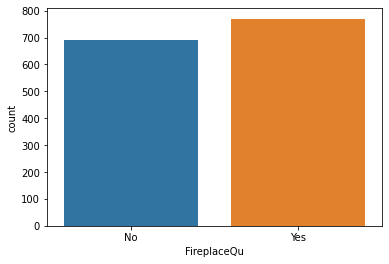

In [194]:
def fireplace(x):
  if x in ['None']:
    return 'No'
  else:
    return 'Yes'

data['FireplaceQu']= data['FireplaceQu'].apply(fireplace)
sns.countplot(data['FireplaceQu'])
plt.show()

In [195]:
data['GarageType'].value_counts(normalize=True)

Attchd     0.595890
Detchd     0.265068
BuiltIn    0.060274
None       0.055479
Basment    0.013014
CarPort    0.006164
2Types     0.004110
Name: GarageType, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


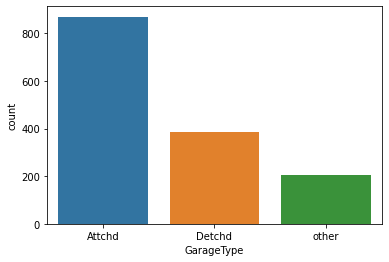

In [196]:
def garage(x):
  if x in ['Attchd', 'Detchd']:
    return x
  else:
    return 'other'

data['GarageType']= data['GarageType'].apply(garage)
sns.countplot(data['GarageType'])
plt.show()

In [197]:
data['GarageFinish'].value_counts(normalize=True)

Unf     0.414384
RFn     0.289041
Fin     0.241096
None    0.055479
Name: GarageFinish, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


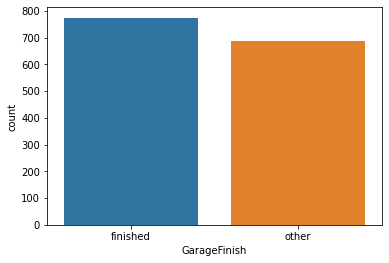

In [198]:
def garfin(x):
  if x in ['Fin', 'RFn']:
    return 'finished'
  else:
    return 'other'

data['GarageFinish']= data['GarageFinish'].apply(garfin)
sns.countplot(data['GarageFinish'])
plt.show()

In [199]:
data['Fence'].value_counts(normalize=True)

None     0.807534
MnPrv    0.107534
GdPrv    0.040411
GdWo     0.036986
MnWw     0.007534
Name: Fence, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


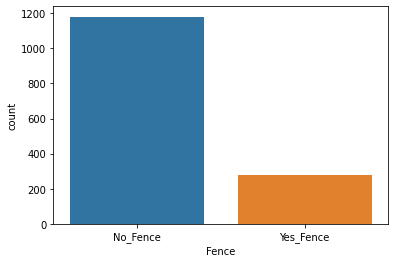

In [200]:
def fence(x):
  if x in ['None']:
    return 'No_Fence'
  else:
    return 'Yes_Fence'
data['Fence']= data['Fence'].apply(fence)
sns.countplot(data['Fence'])
plt.show()

In [177]:
cat_cols

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence', 'MoSold',
       'SaleCondition'],
      dtype='object')

In [201]:
data['SaleCondition'].value_counts(normalize=True)

Normal     0.820548
Partial    0.085616
Abnorml    0.069178
Family     0.013699
Alloca     0.008219
AdjLand    0.002740
Name: SaleCondition, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


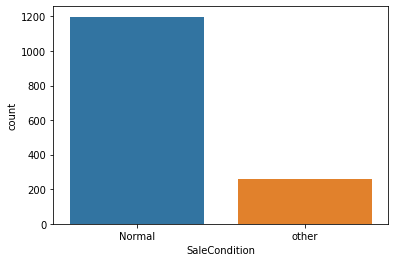

In [202]:
def sale(x):
  if x in ['Normal']:
    return x
  else:
    return 'other'
data['SaleCondition']= data['SaleCondition'].apply(sale)
sns.countplot(data['SaleCondition'])
plt.show()

Converting categorical variables into numbers

In [203]:
from sklearn.preprocessing import LabelEncoder
encode= LabelEncoder()

In [204]:
data_c= data[cat_cols].apply(encode.fit_transform)
data_c.head()

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,Fence,MoSold,SaleCondition
0,3,1,1,0,5,0,1,2,0,0,2,2,1,1,1,1,1,0,1,1,0,0,0,0,3,0
1,1,1,1,1,24,0,0,2,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,8,0
2,3,1,0,0,5,0,1,2,0,0,2,2,1,1,1,1,0,0,1,1,1,0,0,0,11,0
3,0,1,0,1,6,0,1,2,0,0,3,4,0,0,2,0,1,0,1,1,1,1,1,0,3,1
4,3,1,0,1,15,0,1,2,0,0,2,2,1,1,1,1,0,0,1,1,1,0,0,0,2,0


In [205]:
df= pd.concat([data.select_dtypes(exclude='object'), data_c], axis=1)
df.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,remodelling_yr,built_yr,garage_yr,sold_yr,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,Fence,MoSold,SaleCondition
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,208500,18,18,18,13,3,1,1,0,5,0,1,2,0,0,2,2,1,1,1,1,1,0,1,1,0,0,0,0,3,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,181500,45,45,45,14,1,1,1,1,24,0,0,2,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,8,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,223500,19,20,20,13,3,1,0,0,5,0,1,2,0,0,2,2,1,1,1,1,0,0,1,1,1,0,0,0,11,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,140000,51,106,23,15,0,1,0,1,6,0,1,2,0,0,3,4,0,0,2,0,1,0,1,1,1,1,1,0,3,1
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,250000,21,21,21,13,3,1,0,1,15,0,1,2,0,0,2,2,1,1,1,1,0,0,1,1,1,0,0,0,2,0


## Model Building

In [206]:
from sklearn.model_selection import train_test_split
df_train, df_test= train_test_split(df, train_size= 0.75, random_state=17)
print("Train", df_train.shape)
print("Test", df_test.shape)

Train (1095, 59)
Test (365, 59)


In [207]:
y_train= df_train.pop('SalePrice')
X_train= df_train
print(X_train.shape)
print(y_train.shape)

(1095, 58)
(1095,)


In [213]:
y_test= df_test.pop('SalePrice')
X_test= df_test
print(X_test.shape)
print(y_test.shape)

(365, 58)
(365,)


Inspecting the target variable

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


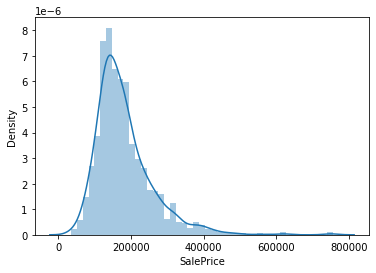

In [208]:
sns.distplot(y_train, hist=True)
plt.show()

In [210]:
y_train.skew()

1.95254264934937

The variable is highly skewed, using log transformation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


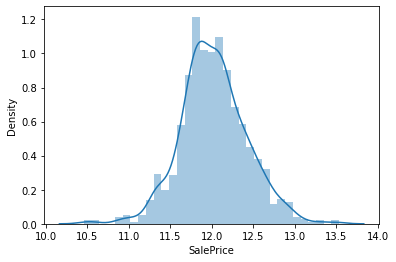

 Now the skewness factor is 0.08758599369816211


In [211]:
y_train_tr= np.log(y_train)
sns.distplot(y_train_tr)
plt.show()
print(" Now the skewness factor is", y_train_tr.skew())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


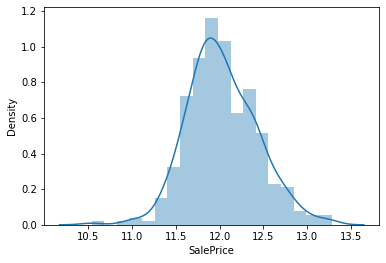

 Now the skewness factor is 0.2268794314164856


In [214]:
y_test_tr= np.log(y_test)
sns.distplot(y_test_tr)
plt.show()
print(" Now the skewness factor is", y_test_tr.skew())


Scaling the independent variables

In [215]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [216]:
col= X_train.columns
X_train_scaled= scaler.fit_transform(X_train)
X_train_scaled= pd.DataFrame(X_train_scaled)
X_train_scaled.columns= col
X_train_scaled.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,remodelling_yr,built_yr,garage_yr,sold_yr,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,Fence,MoSold,SaleCondition
0,0.620011,0.043505,-0.569149,-0.950049,-0.291925,0.375295,-0.731262,-1.094695,0.865649,-0.120759,-0.106178,-0.822070,-0.232705,0.787978,1.237821,0.167752,-0.205353,0.926617,0.605347,0.293445,-0.172227,-0.758520,-0.676285,-0.362573,-0.118513,-0.265204,-0.079381,-0.093027,-1.024500,-1.151631,-1.120577,0.613070,0.929706,-0.177318,-1.318143,1.639167,-1.199476,-0.430192,0.358674,0.741667,-0.810054,-0.528399,-0.060797,-0.125203,-0.818051,1.310390,0.451846,0.815177,0.69696,1.059289,0.691182,1.090871,0.947495,-0.759981,-0.925166,-0.482813,-0.173358,2.096208
1,0.317129,0.134280,0.585630,0.311112,1.123096,0.095749,0.824528,0.671533,-0.794172,-0.120759,-0.170219,-0.822070,-0.232705,0.787978,-0.749589,0.167752,-0.205353,0.302987,0.605347,0.293445,0.471614,1.451788,-0.676285,-0.362573,-0.118513,-0.265204,-0.079381,-0.093027,0.175367,-0.332415,-0.120812,-0.141213,-0.548911,-0.177318,-1.318143,-0.610066,0.310788,-0.430192,-0.912355,0.741667,1.264821,-0.528399,-0.825999,-0.878483,1.222418,-0.763132,-1.007656,0.815177,0.69696,-0.944030,-1.446797,1.090871,0.947495,-0.759981,-0.925166,2.071197,0.148929,-0.477052
2,-0.026860,0.099975,2.570750,-0.950049,-0.291925,2.011325,0.869364,0.722433,-0.794172,-0.120759,-0.132548,-0.822070,-0.232705,0.787978,-0.749589,-1.081832,-0.205353,-0.320643,0.605347,0.293445,0.656244,2.212582,-0.676285,-0.362573,-0.118513,-0.265204,-0.079381,-0.093027,0.703308,0.028040,0.319085,-0.895496,-0.548911,-0.177318,-1.318143,-0.610066,0.310788,-0.430192,-0.912355,0.741667,1.264821,1.892509,-1.591201,-1.631763,1.222418,-0.763132,-1.007656,-1.010219,0.69696,1.059289,-1.446797,-0.916698,0.947495,-0.759981,-0.925166,-0.482813,-0.817930,-0.477052
3,0.446935,0.053898,-0.569149,-0.950049,-0.291925,2.119019,0.974727,0.842048,-0.794172,-0.120759,-0.044020,-0.822070,-0.232705,0.787978,-0.749589,0.167752,-0.205353,0.302987,0.605347,0.293445,1.418438,-0.758520,1.375944,-0.362573,-0.118513,-0.265204,-0.079381,-0.093027,-1.024500,-1.151631,-1.120577,1.367354,-0.548911,-2.383725,0.758643,-0.610066,1.485437,-0.430192,-0.912355,0.741667,-0.810054,-0.528399,-0.060797,-0.125203,-0.818051,1.310390,0.451846,0.815177,0.69696,1.059289,0.691182,1.090871,0.947495,-0.759981,-0.925166,-0.482813,0.148929,2.096208
4,-0.115559,0.022995,-0.569149,1.280576,-0.291925,-1.008685,0.246151,0.014924,-0.794172,-0.120759,-0.656178,1.101364,-0.232705,-1.013350,-0.749589,0.167752,-0.205353,-0.944272,-0.950651,-1.062343,-1.119051,-0.758520,0.027336,-0.362573,-0.118513,-0.265204,-0.079381,-0.093027,1.663202,0.683414,1.118897,-0.141213,1.669015,-0.177318,0.758643,-0.610066,-0.863862,2.324545,-0.912355,-1.378764,-0.810054,-0.528399,-0.825999,-0.878483,-0.818051,-0.763132,-1.007656,-1.010219,0.69696,-0.944030,-1.446797,-0.916698,-1.055414,0.629300,1.080887,-0.482813,-1.462503,-0.477052


In [217]:
#Applying the scaling to test dataset also
X_test_scaled= scaler.transform(X_test)
X_test_scaled= pd.DataFrame(X_test_scaled)
X_test_scaled.columns= col
X_test_scaled.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,remodelling_yr,built_yr,garage_yr,sold_yr,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,Fence,MoSold,SaleCondition
0,0.230591,-0.275910,-0.569149,-0.950049,-0.291925,-0.467925,-1.556235,-0.321016,0.984207,-0.120759,0.564370,-0.822070,-0.232705,0.787978,-0.749589,1.417337,4.479270,0.926617,0.605347,0.293445,0.926089,1.996356,-0.676285,0.278088,-0.118513,-0.265204,-0.079381,-0.093027,-0.544553,2.321847,-0.840643,-1.649779,1.669015,2.029088,0.758643,-0.610066,0.814209,2.324545,0.358674,-1.378764,1.264821,-0.528399,0.704405,0.628077,-0.818051,-0.763132,1.911348,0.815177,0.696960,1.059289,0.691182,1.090871,0.947495,0.629300,1.080887,2.071197,0.793501,-0.477052
1,2.307494,0.508418,-0.481165,1.782467,-0.291925,-0.706226,1.066640,0.946392,-0.794172,-0.120759,0.033206,1.101364,-0.232705,0.787978,-0.749589,0.167752,-0.205353,0.302987,0.605347,0.293445,-0.219568,0.586885,-0.148569,-0.362573,-0.118513,-0.265204,-0.079381,-0.093027,-0.976505,-1.118863,-1.080586,-0.895496,-0.548911,-0.177318,-1.318143,-0.610066,1.653244,-0.430192,-0.912355,0.741667,-0.810054,1.892509,-0.060797,-0.125203,1.222418,1.310390,0.451846,0.815177,-1.434803,-0.944030,0.691182,1.090871,0.947495,-0.759981,-0.925166,-0.482813,0.148929,-0.477052
2,0.187323,-0.087830,-0.569149,-0.218661,-0.291925,0.476115,0.131820,-0.114871,1.162045,-0.120759,0.863857,-0.822070,-0.232705,0.787978,1.237821,0.167752,-0.205353,0.926617,0.605347,0.293445,1.006569,-0.758520,0.027336,-0.362573,-0.118513,-0.265204,-0.079381,-0.093027,-0.976505,-1.118863,-1.080586,-0.895496,0.929706,-0.177318,0.758643,-0.610066,1.485437,-0.430192,0.358674,0.741667,-0.810054,-0.528399,-0.060797,-0.125203,-0.818051,1.310390,0.451846,0.815177,-1.434803,-0.944030,0.691182,1.090871,0.947495,-0.759981,-0.925166,-0.482813,-0.817930,-0.477052
3,0.620011,-0.057939,1.685420,-0.950049,-0.291925,2.345863,1.196663,1.094002,-0.794172,-0.120759,0.142452,-0.822070,-0.232705,0.787978,-0.749589,0.167752,-0.205353,0.302987,0.605347,1.649232,1.650410,0.394684,-0.016640,-0.362573,-0.118513,-0.265204,-0.079381,-0.093027,-1.024500,-1.151631,-1.120577,0.613070,-0.548911,-0.177318,0.758643,-0.610066,1.485437,-0.430192,-0.912355,0.741667,-0.810054,1.892509,-0.060797,-0.125203,1.222418,1.310390,0.451846,0.815177,-1.434803,1.059289,0.691182,1.090871,0.947495,-0.759981,-0.925166,-0.482813,-1.140217,-0.477052
4,-0.026860,0.953741,0.442658,-0.874980,5.101292,0.780866,1.692095,2.801695,-0.794172,-0.120759,1.406322,1.101364,-0.232705,0.787978,-0.749589,0.167752,-0.205353,0.302987,2.161344,0.293445,-0.124886,0.570868,1.082769,2.712597,-0.118513,-0.265204,-0.079381,-0.093027,1.519218,0.585108,0.998925,0.613070,-0.548911,-0.177318,0.758643,1.639167,-1.031669,-0.430192,-0.912355,0.741667,-0.810054,1.892509,0.704405,0.628077,1.222418,-0.763132,-1.007656,0.815177,-1.434803,-0.944030,-1.446797,1.090871,0.947495,2.018580,1.080887,2.071197,1.438074,2.096208


Applying regression techniques

In [218]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

### 1. Linear Regression

In [219]:
lr= LinearRegression()
lr.fit(X_train_scaled, y_train_tr)

LinearRegression()

In [221]:
print(lr.intercept_)
print(lr.coef_)

12.022129352878133
[-9.16370607e-03  1.54429190e-02  1.15877151e-02  4.45368056e+11
  1.53916178e+11  4.16888034e+11 -4.26108988e+11 -6.95062887e+10
 -7.75856580e+10 -8.65664737e+09  9.39142221e+10  2.24983107e-02
  7.09921079e-03  2.06381489e-02  9.49290780e-03  3.37633907e-03
 -1.67603512e-02  3.15147625e-02  7.29873679e-03  6.11191209e-02
  7.22134545e-03  1.06182557e-02 -3.93332789e-04  4.65365249e-03
  7.38901704e-03  2.03965906e-02 -1.34772543e-02 -5.30797514e-04
 -4.33857489e-02 -7.73320447e-02  1.30127822e-02  3.62391125e-03
 -1.48335379e-03 -1.49078369e-02 -3.49426270e-03 -5.34057617e-04
  1.66168213e-02 -2.30102539e-02 -1.28173828e-03  2.17285156e-02
  3.61328125e-02  1.01928711e-02  4.66918945e-03 -9.35363770e-03
 -8.26263428e-03  3.28826904e-02  9.36889648e-03 -5.40161133e-03
 -2.04772949e-02 -1.18408203e-02  1.64794922e-02  1.28021240e-02
  2.85644531e-02 -1.58996582e-02 -3.54003906e-03 -4.42504883e-04
 -3.06701660e-03 -9.90295410e-03]


In [222]:
#Making prediction
y_train_pred= lr.predict(X_train_scaled)
y_test_pred= lr.predict(X_test_scaled)

In [223]:
lin_mse_train= mean_squared_error(y_train_tr, y_train_pred)
lin_mse_test= mean_squared_error(y_test_tr, y_test_pred)

print('mse for train', lin_mse_train)
print('mse for test', lin_mse_test)

mse for train 0.025269334128352725
mse for test 0.02251391227388884


In [224]:
print(r2_score(y_train_tr, y_train_pred))
print(r2_score(y_test_tr, y_test_pred))

0.8422078555676037
0.8569085050750076


### 2. Ridge Regression

In [225]:

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100,200, 500,700,900, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_squared_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_cv.fit(X_train_scaled, y_train_tr)

Fitting 5 folds for each of 31 candidates, totalling 155 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200, 500, 700, 900, ...]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

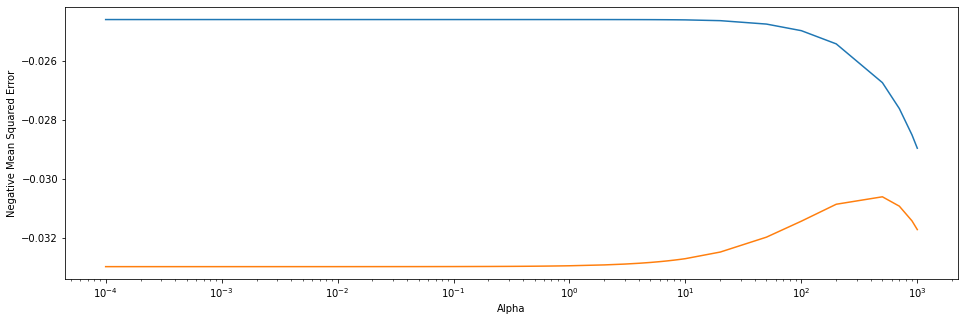

In [226]:
## Plotting the variation of alpha vs negative mean squared error
plt.figure(figsize=[16,5])
plt.plot(ridge_cv.cv_results_['param_alpha'].data, ridge_cv.cv_results_['mean_train_score'])
plt.plot(ridge_cv.cv_results_['param_alpha'].data, ridge_cv.cv_results_['mean_test_score'])
plt.xscale("log")
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Squared Error')
plt.show()

In [227]:
print(ridge_cv.best_params_)

{'alpha': 500}


In [228]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised
alpha = 500
ridge = Ridge(alpha= alpha)

ridge.fit(X_train_scaled, y_train_tr)
print(ridge.coef_)

[ 1.42212822e-03  1.20001891e-02  1.08727877e-02  1.56095993e-02
  6.24883927e-03  9.10258052e-03  2.74778791e-02  2.93123617e-02
  1.82821913e-02 -2.35782608e-04  3.67759872e-02  1.53780045e-02
  4.76616764e-03  2.29487452e-02  1.47563076e-02  1.14362129e-02
 -1.45910253e-02  2.78916641e-02  1.99715202e-02  3.57325291e-02
  2.53839796e-02  1.22629927e-02  4.20952001e-03 -7.96916097e-04
  5.59321832e-03  1.42827799e-02 -7.57295623e-03 -9.74030334e-04
 -3.46287755e-02 -2.65616593e-02 -5.70519365e-03  2.19446609e-03
  1.98098984e-03 -1.18337172e-02 -7.65573162e-03  1.57932010e-03
  1.35346578e-02 -1.45455420e-02 -7.38007702e-05  2.36419534e-02
  1.64886501e-02  1.08791684e-02  3.73620236e-04 -3.51467243e-03
  1.48748682e-03  2.66788656e-02  4.70215417e-03  7.90571759e-03
 -1.63845409e-02 -1.36824121e-02  1.80083057e-02  2.26689223e-02
  2.17539949e-02 -1.62030765e-02 -1.31228556e-02 -1.80123527e-03
 -2.51737556e-03 -4.26352838e-03]


In [229]:
y_train_pred_r= ridge.predict(X_train_scaled)
y_test_pred_r= ridge.predict(X_test_scaled)

In [230]:
ridge_mse_train= mean_squared_error(y_train_tr, y_train_pred_r)
ridge_mse_test= mean_squared_error(y_test_tr, y_test_pred_r)

print('mse for train', ridge_mse_train)
print('mse for test', ridge_mse_test)

mse for train 0.026814416033529024
mse for test 0.02298204971862857


In [231]:
print(r2_score(y_train_tr, y_train_pred_r))
print(r2_score(y_test_tr, y_test_pred_r))

0.8325597268949961
0.8539331676044133


### 3. Lasso Regression

In [232]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001,0.002, 0.005,0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation
folds = 5
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_squared_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_cv.fit(X_train_scaled, y_train_tr) 

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.002, 0.005, 0.01, 0.05, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

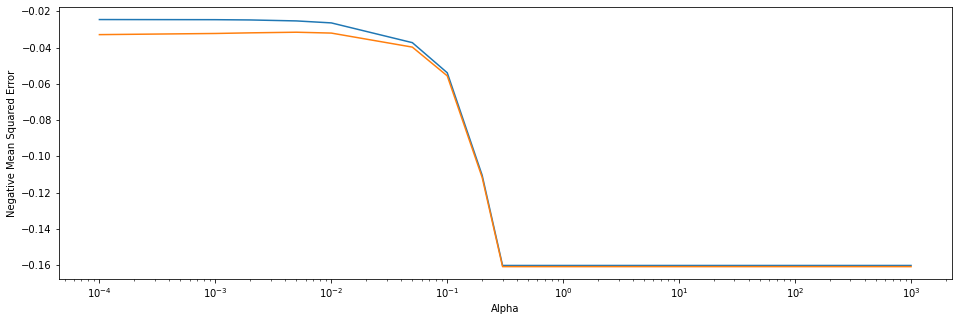

In [233]:
## Plotting the variation of alpha vs negative mean squared error
plt.figure(figsize=[16,5])
plt.plot(lasso_cv.cv_results_['param_alpha'].data, lasso_cv.cv_results_['mean_train_score'])
plt.plot(lasso_cv.cv_results_['param_alpha'].data, lasso_cv.cv_results_['mean_test_score'])
plt.xscale("log")
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Squared Error')
plt.show()

In [234]:
print(lasso_cv.best_params_)

{'alpha': 0.005}


In [235]:
#Fitting Lasso model for alpha = 0.005 and printing coefficients which have been penalised
alpha = 0.005
lasso = Lasso(alpha= alpha)

lasso.fit(X_train_scaled, y_train_tr)
print(lasso.coef_)

[-0.          0.01168769  0.00436223  0.00354859  0.         -0.
  0.03404994  0.01089925  0.         -0.          0.102693    0.01732644
  0.0023609   0.01383337  0.00311303  0.         -0.01488813  0.02573195
  0.00775785  0.06385309  0.00336706  0.00826992  0.          0.
  0.00188833  0.01542656 -0.00878791 -0.         -0.04384512 -0.05717871
  0.          0.          0.         -0.0122562  -0.00280374  0.
  0.01246164 -0.019059   -0.          0.02144094  0.02751313  0.00666008
 -0.         -0.00092417  0.          0.02981731  0.          0.
 -0.01699413 -0.01199465  0.01536498  0.01359374  0.03036977 -0.01619234
 -0.00399554 -0.         -0.         -0.00369539]


In [236]:
y_train_pred_l= lasso.predict(X_train_scaled)
y_test_pred_l= lasso.predict(X_test_scaled)

In [237]:
lasso_mse_train= mean_squared_error(y_train_tr, y_train_pred_l)
lasso_mse_test= mean_squared_error(y_test_tr, y_test_pred_l)

print('mse for train', lasso_mse_train)
print('mse for test', lasso_mse_test)

mse for train 0.02593648073327372
mse for test 0.022141853556205977


In [238]:
print(r2_score(y_train_tr, y_train_pred_l))
print(r2_score(y_test_tr, y_test_pred_l))

0.8380419170071902
0.8592731957367395


In [239]:
compare_models= pd.DataFrame(index= ['Linear', 'Ridge', 'Lasso'])

compare_models['mse_train']= [lin_mse_train, ridge_mse_train, lasso_mse_train]
compare_models['mse_test']= [lin_mse_test, ridge_mse_test, lasso_mse_test]
compare_models

,mse_train,mse_test
Linear,0.025269,0.022514
Ridge,0.026814,0.022982
Lasso,0.025936,0.022142


### Lasso regression performed slightly better than Ridge on test data

In [240]:
betas = pd.DataFrame(index=X_train_scaled.columns)
betas.rows = X_train_scaled.columns

betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [241]:
betas['Lasso_mag']= betas.Lasso.apply(lambda x: abs(x))
betas.head()

,Lasso,Lasso_mag
LotFrontage,-0.000000,0.000000
LotArea,0.011688,0.011688
MasVnrArea,0.004362,0.004362
BsmtFinSF1,0.003549,0.003549
BsmtFinSF2,0.000000,0.000000


In [242]:
betas.sort_values(by='Lasso_mag', ascending=False).head(10)

,Lasso,Lasso_mag
GrLivArea,0.102693,0.102693
GarageCars,0.063853,0.063853
built_yr,-0.057179,0.057179
remodelling_yr,-0.043845,0.043845
TotalBsmtSF,0.034050,0.034050
FireplaceQu,0.030370,0.030370
ExterQual,0.029817,0.029817
OverallCond,0.027513,0.027513
TotRmsAbvGrd,0.025732,0.025732
OverallQual,0.021441,0.021441


## The top 10 predicting variables are- GrLivArea, GarageCars, built_yr, remodelling_yr, TotalBsmtSF, FireplaceQU, ExterQual, OverallCond, TotRmsAbvGrd and OverallQual. 